In [1]:
import os
import sys

seed = 0
os.environ['PYTHONHASSEED'] = str(seed)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

from tensorflow.random import set_seed

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import load_model

In [3]:
# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from src.data_reader import DataReader
from src.dataset_exploration import unit_cycle_info
from src.metrics import compute_evaluation_metrics
from src.model_evaluation import evaluate_mlp, evaluate_mlp_multiple_splits
from src.plotting import plot_loss_curves, plot_rul, plot_rul_confidence_interval
from src.save_object import load_object

In [5]:
# Set seed
random.seed(seed)
np.random.seed(seed)
set_seed(seed)

In [6]:
# Set input and output paths
filename = r'../data/N-CMAPSS_DS02-006.h5'
output_path = r'../results/feature_subsets'

if not os.path.exists(output_path):
    os.makedirs(output_path)

In [7]:
data_reader = DataReader()

start_time = time.process_time()  
data_reader.load_dataset(filename, load_train=True, load_test=True)
print("Operation time (sec): " , (time.process_time() - start_time))

if data_reader.train_set is not None:
    print("Train set shape: " + str(data_reader.train_set.shape))
    
if data_reader.test_set is not None:   
    print("Test set shape: " + str(data_reader.test_set.shape))

Operation time (sec):  4.203125
Train set shape: (5263447, 47)
Test set shape: (1253743, 47)


In [8]:
FS1 = ['T24', 'T30', 'P15', 'SmFan', 'SmLPC']
FS2 = data_reader.column_names.w_cols + data_reader.column_names.x_s_cols + data_reader.column_names.x_v_cols
FS3 = data_reader.column_names.w_cols + data_reader.column_names.x_s_cols
FS4 = FS2 + ['HPT_flow_mod', 'LPT_flow_mod', 'LPT_eff_mod']

In [9]:
train_set = data_reader.train_set
test_set = data_reader.test_set

In [10]:
y_test = test_set['RUL']
x_test = test_set.drop(['RUL'], axis=1)

x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)

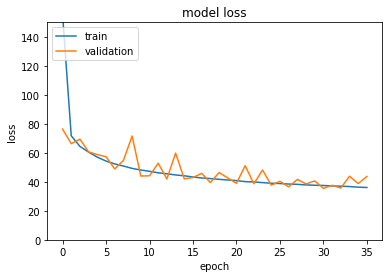

Test set:
MSE: 61.66
RMSE: 7.85
CMAPSS score: 1.80



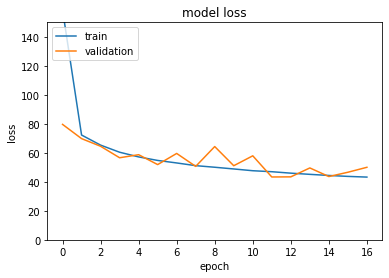

Test set:
MSE: 65.89
RMSE: 8.12
CMAPSS score: 1.82



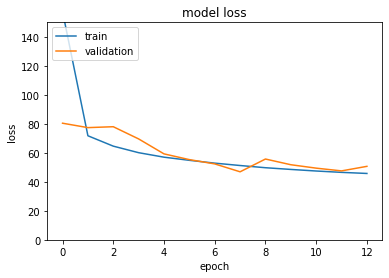

Test set:
MSE: 53.68
RMSE: 7.33
CMAPSS score: 1.73

MSE: mean = 60.41   stddev = 5.06
RMSE: mean = 7.77   stddev = 0.33
CMAPSS: mean = 1.79   stddev = 0.04


In [11]:
NUM_TRIALS = 3
TRAIN_RESULTS_PATH = r'../results/feature_subsets/FS1'

x_test_fs = x_test[FS1]
results = evaluate_mlp_multiple_splits(x_test_fs, y_test, NUM_TRIALS, TRAIN_RESULTS_PATH, plot_loss=True)

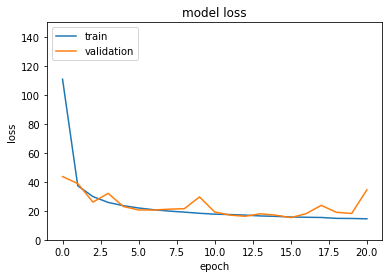

Test set:
MSE: 57.05
RMSE: 7.55
CMAPSS score: 1.74



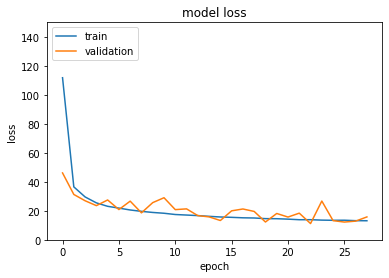

Test set:
MSE: 45.06
RMSE: 6.71
CMAPSS score: 1.64



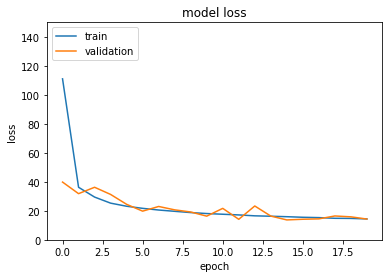

Test set:
MSE: 50.84
RMSE: 7.13
CMAPSS score: 1.67

MSE: mean = 50.98   stddev = 4.89
RMSE: mean = 7.13   stddev = 0.34
CMAPSS: mean = 1.68   stddev = 0.04


In [12]:
NUM_TRIALS = 3
TRAIN_RESULTS_PATH = r'../results/feature_subsets/FS2'

x_test_fs = x_test[FS2]
results = evaluate_mlp_multiple_splits(x_test_fs, y_test, NUM_TRIALS, TRAIN_RESULTS_PATH, plot_loss=True)

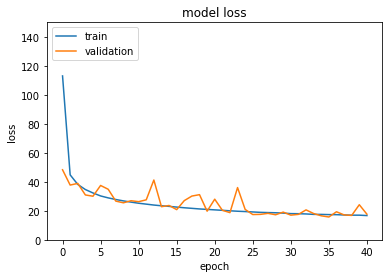

Test set:
MSE: 68.15
RMSE: 8.26
CMAPSS score: 1.84



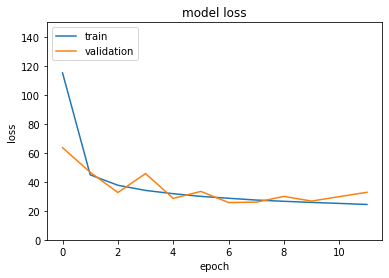

Test set:
MSE: 57.54
RMSE: 7.59
CMAPSS score: 1.74



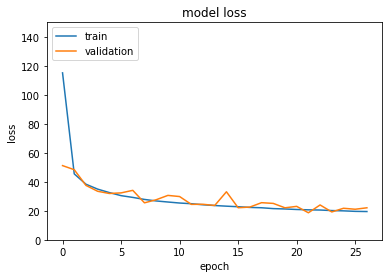

Test set:
MSE: 69.95
RMSE: 8.36
CMAPSS score: 1.85

MSE: mean = 65.21   stddev = 5.47
RMSE: mean = 8.07   stddev = 0.34
CMAPSS: mean = 1.81   stddev = 0.05


In [13]:
NUM_TRIALS = 3
TRAIN_RESULTS_PATH = r'../results/feature_subsets/FS3'

x_test_fs = x_test[FS3]
results = evaluate_mlp_multiple_splits(x_test_fs, y_test, NUM_TRIALS, TRAIN_RESULTS_PATH, plot_loss=True)

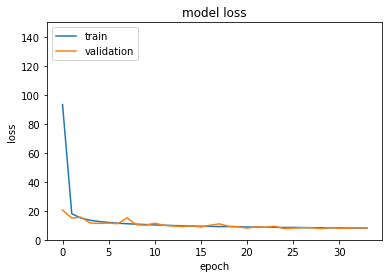

Test set:
MSE: 58.16
RMSE: 7.63
CMAPSS score: 1.74



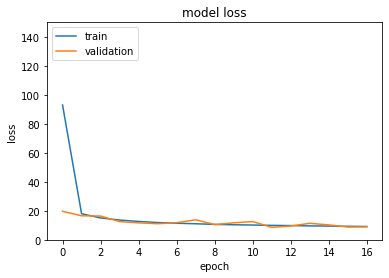

Test set:
MSE: 51.29
RMSE: 7.16
CMAPSS score: 1.67



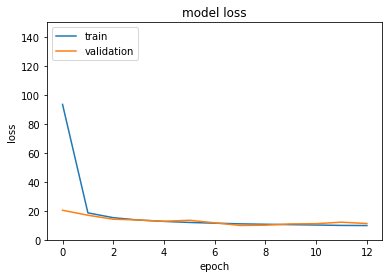

Test set:
MSE: 45.15
RMSE: 6.72
CMAPSS score: 1.61

MSE: mean = 51.54   stddev = 5.31
RMSE: mean = 7.17   stddev = 0.37
CMAPSS: mean = 1.67   stddev = 0.06


In [14]:
NUM_TRIALS = 3
TRAIN_RESULTS_PATH = r'../results/feature_subsets/FS4'

x_test_fs = x_test[FS4]
results = evaluate_mlp_multiple_splits(x_test_fs, y_test, NUM_TRIALS, TRAIN_RESULTS_PATH, plot_loss=True)

In [11]:
y_train = train_set['RUL']
x_train = train_set.drop(['RUL'], axis=1)

x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)

Saved object to file: ../results/feature_subsets\FS1\split_0\scaler.pkl
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 231,809
Trainable params: 231,809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
9249/9253 [======================

Epoch 28/60
9247/9253 [============================>.] - ETA: 0s - loss: 38.2587
Epoch 00028: val_loss did not improve from 36.48779
9253/9253 [==============================] - 37s 4ms/step - loss: 38.2559 - val_loss: 41.6697
Epoch 29/60
9243/9253 [============================>.] - ETA: 0s - loss: 37.8695
Epoch 00029: val_loss did not improve from 36.48779
9253/9253 [==============================] - 37s 4ms/step - loss: 37.8693 - val_loss: 38.5000
Epoch 30/60
9251/9253 [============================>.] - ETA: 0s - loss: 37.6351
Epoch 00030: val_loss did not improve from 36.48779
9253/9253 [==============================] - 37s 4ms/step - loss: 37.6362 - val_loss: 40.6692
Epoch 31/60
9243/9253 [============================>.] - ETA: 0s - loss: 37.4764
Epoch 00031: val_loss improved from 36.48779 to 35.47985, saving model to ../results/feature_subsets\FS1\split_0\mlp_model_trained.h5
9253/9253 [==============================] - 37s 4ms/step - loss: 37.4777 - val_loss: 35.4799
Epoch 32/6

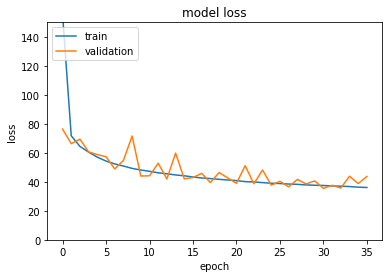

Saved object to file: ../results/feature_subsets\FS1\split_0\history_0.pkl
Test set:
MSE: 61.66
RMSE: 7.85
CMAPSS score: 1.80

Saved object to file: ../results/feature_subsets\FS1\split_1\scaler.pkl
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               1536      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 231,809
Trainable params: 231,809
Non-t

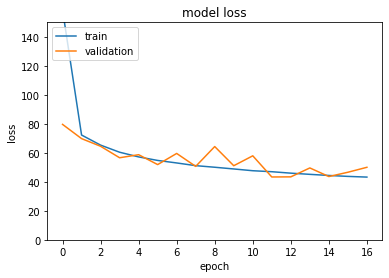

Saved object to file: ../results/feature_subsets\FS1\split_1\history_1.pkl
Test set:
MSE: 65.89
RMSE: 8.12
CMAPSS score: 1.82

Saved object to file: ../results/feature_subsets\FS1\split_2\scaler.pkl
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               1536      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 231,809
Trainable params: 231,809
Non-t

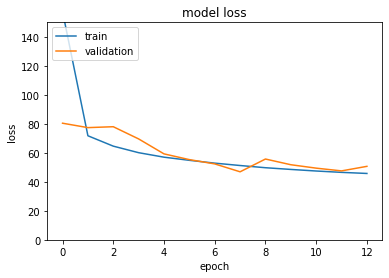

Saved object to file: ../results/feature_subsets\FS1\split_2\history_2.pkl
Test set:
MSE: 53.68
RMSE: 7.33
CMAPSS score: 1.73

MSE: mean = 60.41   stddev = 5.06
RMSE: mean = 7.77   stddev = 0.33
CMAPSS: mean = 1.79   stddev = 0.04


([61.659534, 65.88703, 53.675785],
 [7.8523583, 8.117083, 7.326376],
 [1.8003177285934997, 1.8241358077373113, 1.7308327942808055])

In [13]:
# Train single MLP
from src.training import MLPConfigParams, train_evaluate_mlp

EPOCHS = 60
BATCH_SIZE = 512
NUM_TRIALS = 3
mlp_config_params = MLPConfigParams(layer_sizes=[256, 256, 512, 64], activation='tanh', dropout=0.0)

results_path = os.path.join(output_path, f"FS1")
if not os.path.exists(results_path):
    os.makedirs(results_path)
    
x_train_fs = x_train[FS1]
x_test_fs = x_test[FS1]

train_evaluate_mlp(
        x_train_fs, y_train, 
        x_test_fs, y_test,
        NUM_TRIALS,
        mlp_config_params, 
        results_path, 
        EPOCHS, BATCH_SIZE)

Saved object to file: ../results/feature_subsets\FS4\split_0\scaler.pkl
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               9216      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_18 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 239,489
Trainable params: 239,489
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
9248/9253 [====================

Epoch 28/60
9244/9253 [============================>.] - ETA: 0s - loss: 8.3694
Epoch 00028: val_loss did not improve from 7.72397
9253/9253 [==============================] - 39s 4ms/step - loss: 8.3684 - val_loss: 8.3023
Epoch 29/60
9245/9253 [============================>.] - ETA: 0s - loss: 8.3173
Epoch 00029: val_loss improved from 7.72397 to 7.70075, saving model to ../results/feature_subsets\FS4\split_0\mlp_model_trained.h5
9253/9253 [==============================] - 38s 4ms/step - loss: 8.3165 - val_loss: 7.7008
Epoch 30/60
9247/9253 [============================>.] - ETA: 0s - loss: 8.2257
Epoch 00030: val_loss did not improve from 7.70075
9253/9253 [==============================] - 38s 4ms/step - loss: 8.2253 - val_loss: 8.4401
Epoch 31/60
9245/9253 [============================>.] - ETA: 0s - loss: 8.2324
Epoch 00031: val_loss did not improve from 7.70075
9253/9253 [==============================] - 37s 4ms/step - loss: 8.2327 - val_loss: 7.9057
Epoch 32/60
9249/9253 [====

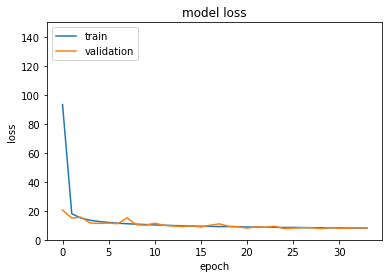

Saved object to file: ../results/feature_subsets\FS4\split_0\history_0.pkl
Test set:
MSE: 58.16
RMSE: 7.63
CMAPSS score: 1.74

Saved object to file: ../results/feature_subsets\FS4\split_1\scaler.pkl
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               9216      
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_22 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_23 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 239,489
Trainable params: 239,489
Non-t

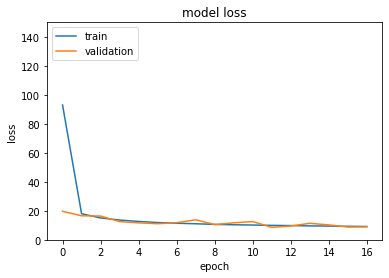

Saved object to file: ../results/feature_subsets\FS4\split_1\history_1.pkl
Test set:
MSE: 51.29
RMSE: 7.16
CMAPSS score: 1.67

Saved object to file: ../results/feature_subsets\FS4\split_2\scaler.pkl
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               9216      
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_28 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 239,489
Trainable params: 239,489
Non-t

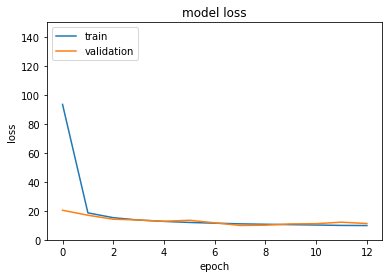

Saved object to file: ../results/feature_subsets\FS4\split_2\history_2.pkl
Test set:
MSE: 45.15
RMSE: 6.72
CMAPSS score: 1.61

MSE: mean = 51.54   stddev = 5.31
RMSE: mean = 7.17   stddev = 0.37
CMAPSS: mean = 1.67   stddev = 0.06


([58.163086, 51.29114, 45.154865],
 [7.6264725, 7.161783, 6.719737],
 [1.7410984547869859, 1.6687620588908572, 1.6051882243809137])

In [14]:
# Train single MLP
EPOCHS = 60
BATCH_SIZE = 512
NUM_TRIALS = 3
mlp_config_params = MLPConfigParams(layer_sizes=[256, 256, 512, 64], activation='tanh', dropout=0.0)

results_path = os.path.join(output_path, f"FS4")
if not os.path.exists(results_path):
    os.makedirs(results_path)
    
x_train_fs = x_train[FS4]
x_test_fs = x_test[FS4]

train_evaluate_mlp(
        x_train_fs, y_train, 
        x_test_fs, y_test,
        NUM_TRIALS,
        mlp_config_params, 
        results_path, 
        EPOCHS, BATCH_SIZE)

Saved object to file: ../results/feature_subsets\FS2\split_0\scaler.pkl
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_32 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_33 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 65        
Total params: 238,721
Trainable params: 238,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
9250/9253 [====================

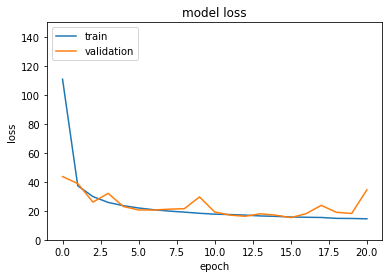

Saved object to file: ../results/feature_subsets\FS2\split_0\history_0.pkl
Test set:
MSE: 57.05
RMSE: 7.55
CMAPSS score: 1.74

Saved object to file: ../results/feature_subsets\FS2\split_1\scaler.pkl
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_36 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_37 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_38 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 65        
Total params: 238,721
Trainable params: 238,721
Non-t

Epoch 28/60
9252/9253 [============================>.] - ETA: 0s - loss: 13.1370
Epoch 00028: val_loss did not improve from 11.20784
9253/9253 [==============================] - 38s 4ms/step - loss: 13.1370 - val_loss: 15.7805
Epoch 00028: early stopping


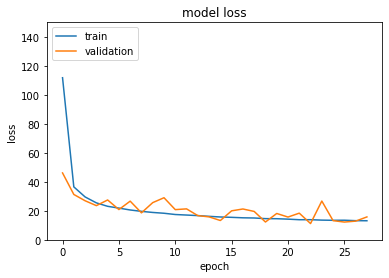

Saved object to file: ../results/feature_subsets\FS2\split_1\history_1.pkl
Test set:
MSE: 45.06
RMSE: 6.71
CMAPSS score: 1.64

Saved object to file: ../results/feature_subsets\FS2\split_2\scaler.pkl
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_41 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_42 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_43 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 65        
Total params: 238,721
Trainable params: 238,721
Non-t

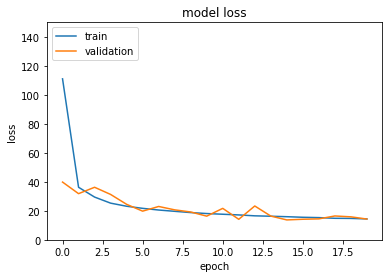

Saved object to file: ../results/feature_subsets\FS2\split_2\history_2.pkl
Test set:
MSE: 50.84
RMSE: 7.13
CMAPSS score: 1.67

MSE: mean = 50.98   stddev = 4.89
RMSE: mean = 7.13   stddev = 0.34
CMAPSS: mean = 1.68   stddev = 0.04


([57.049103, 45.063786, 50.83805],
 [7.553086, 6.7129564, 7.1300807],
 [1.7358368102553714, 1.6412831417603129, 1.6722142217344385])

In [15]:
# Train single MLP
EPOCHS = 60
BATCH_SIZE = 512
NUM_TRIALS = 3
mlp_config_params = MLPConfigParams(layer_sizes=[256, 256, 512, 64], activation='tanh', dropout=0.0)

results_path = os.path.join(output_path, f"FS2")
if not os.path.exists(results_path):
    os.makedirs(results_path)
    
x_train_fs = x_train[FS2]
x_test_fs = x_test[FS2]

train_evaluate_mlp(
        x_train_fs, y_train, 
        x_test_fs, y_test,
        NUM_TRIALS,
        mlp_config_params, 
        results_path, 
        EPOCHS, BATCH_SIZE)